Next we'll look at the services and transfers tables.

Let's start by importing the libraries that we will need.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [4]:
services_df = pd.read_csv('..\Extracted CSVs\SERVICES.csv')
transfers_df = pd.read_csv('..\Extracted CSVs\TRANSFERS.csv')

Let's get a feel of the data.

In [5]:
services_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB


In [6]:
services_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73343 entries, 0 to 73342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ROW_ID        73343 non-null  int64 
 1   SUBJECT_ID    73343 non-null  int64 
 2   HADM_ID       73343 non-null  int64 
 3   TRANSFERTIME  73343 non-null  object
 4   PREV_SERVICE  14668 non-null  object
 5   CURR_SERVICE  73343 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [7]:
transfers_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2142-05-05 11:46:32,NaN,NaN
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15


In [8]:
transfers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261897 entries, 0 to 261896
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         261897 non-null  int64  
 1   SUBJECT_ID     261897 non-null  int64  
 2   HADM_ID        261897 non-null  int64  
 3   ICUSTAY_ID     87721 non-null   float64
 4   DBSOURCE       261656 non-null  object 
 5   EVENTTYPE      261873 non-null  object 
 6   PREV_CAREUNIT  96009 non-null   object 
 7   CURR_CAREUNIT  96016 non-null   object 
 8   PREV_WARDID    202964 non-null  float64
 9   CURR_WARDID    202954 non-null  float64
 10  INTIME         261873 non-null  object 
 11  OUTTIME        202921 non-null  object 
 12  LOS            202921 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 26.0+ MB


<AxesSubplot:>

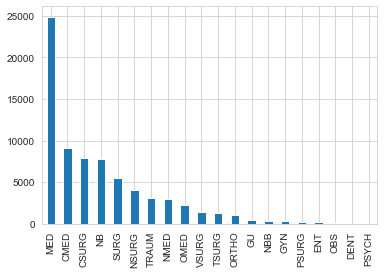

In [9]:
services_df['CURR_SERVICE'].value_counts().plot(kind='bar')

This plot gives us an idea of the current units that the patients are admitted in.

([<matplotlib.patches.Wedge at 0x23a8189c2e0>,
 [Text(-0.17227142372286822, 1.0864265076702133, 'transfer'),
  Text(-0.5744415632899714, -0.9380921545162682, 'discharge'),
  Text(0.8365529823357661, -0.7142682323505194, 'admit')])

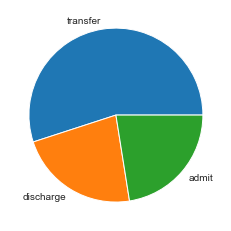

In [10]:
plt.pie(transfers_df['EVENTTYPE'].value_counts(), labels = ['transfer', 'discharge', 'admit'])

This pie chart represents the percentage of events that were transfers, discharges, and admits.

Average length of stay in each unit

In [11]:
transfers_df.groupby('CURR_CAREUNIT')['LOS'].mean()

CURR_CAREUNIT
CCU       66.257681
CSRU      65.022379
MICU      76.956774
NICU     104.524207
NWARD     38.334765
SICU      97.801021
TSICU     78.079586
Name: LOS, dtype: float64

This marks the end of the first section. The tables explored have been summarised below. <br>
**ADMISSIONS**: Every unique hospitalization for each patient in the database <br>
**CALLOUT**: Information regarding when a patient was cleared for ICU discharge and when the patient was actually discharged  <br> 
**ICUSTAYS**: Every unique ICU stay in the database  <br>
**PATIENTS**: Every unique patient in the database <br>
**SERVICES**: The clinical service under which a patient is registered <br>
**TRANSFERS**: Patient movement from bed to bed within the hospital, including ICU admission and discharge <br>